In [1]:
%cd ..

/Users/crupley/gal/hoodie


In [91]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.metrics import pairwise_distances

from code.clusterize import *

In [7]:
fdf = load_featuredf()
fdf.head()

,lat,lon,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,population,walkscore
0,37.750067,-122.441075,0.288994,-0.640949,-0.561362,-0.582297,-0.509058,0.477959,-0.017894,-0.102338,-0.025533
1,37.750196,-122.438933,0.336486,-0.576766,-0.465886,-0.515304,-0.509038,1.060608,0.253293,0.043369,0.146457
2,37.756794,-122.436270,0.350392,-0.131126,-0.396314,-0.227381,-0.313369,0.276664,0.244508,0.413731,0.701471
3,37.753529,-122.437050,0.327277,-0.298948,-0.286766,-0.356888,-0.456736,0.945703,0.372523,0.260021,0.594762
4,37.755758,-122.433400,0.355234,0.018376,-0.470065,-0.123353,-0.345027,0.674973,0.360681,0.530529,0.622791


In [13]:
cnum = cut2cluster('010405', 28)

In [14]:
nodelist = set(fdf.index).intersection(set(cnum.index))
fdf = fdf.ix[nodelist]
cnum = cnum.ix[nodelist]
print cnum.shape
print fdf.shape

(7299,)
(7299, 11)


In [15]:
len(cnum.unique())

25

In [89]:
cnum.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 24, 25])

In [96]:
sim = most_similar(fdf, cnum)
sim

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,24,25
0,0.000000,1.214437,1.631896,2.695179,3.083136,1.017432,1.083235,3.826779,2.213604,1.927196,...,2.011608,2.206302,1.169621,0.836410,1.649377,1.858470,2.009443,1.966903,1.694904,5.801696
1,1.214437,0.000000,2.597346,3.071957,3.635174,2.139089,0.799384,3.078860,3.005131,2.810849,...,1.546873,1.577866,2.054152,1.681885,2.763459,2.917214,3.042421,2.944605,2.590869,5.973425
2,1.631896,2.597346,0.000000,1.964277,1.961732,0.972042,2.546027,4.958650,1.054066,0.669590,...,3.522418,3.014093,0.884924,1.183978,1.096943,0.541038,0.659570,1.038094,0.749232,4.989331
3,2.695179,3.071957,1.964277,0.000000,1.439485,2.423889,3.396529,4.505708,2.033703,2.337429,...,4.025570,2.523791,2.297226,2.443741,3.019711,2.242160,2.049974,2.866982,2.386380,4.481675
4,3.083136,3.635174,1.961732,1.439485,0.000000,2.535222,3.873943,5.069979,1.503584,2.054578,...,4.521829,3.266221,2.503764,2.804019,2.949659,2.139073,1.923069,2.561456,2.318462,3.928311
5,1.017432,2.139089,0.972042,2.423889,2.535222,0.000000,2.051930,4.466682,1.455406,1.389189,...,2.812102,2.763752,1.104456,1.098570,1.079476,1.147977,1.123197,1.236029,1.322346,5.655676
6,1.083235,0.799384,2.546027,3.396529,3.873943,2.051930,0.000000,3.630818,3.093910,2.697986,...,1.605893,2.257478,1.867075,1.496852,2.449709,2.791920,3.018999,2.810259,2.384409,6.166926
7,3.826779,3.078860,4.958650,4.505708,5.069979,4.466682,3.630818,0.000000,5.110045,5.255730,...,2.752207,2.318967,4.618813,4.414256,5.372967,5.208192,5.179458,5.417477,5.167234,6.792042
8,2.213604,3.005131,1.054066,2.033703,1.503584,1.455406,3.093910,5.110045,0.000000,1.146353,...,3.875464,3.232668,1.739918,1.938721,1.746668,1.342826,1.046269,1.244848,1.444216,4.942301
9,1.927196,2.810849,0.669590,2.337429,2.054578,1.389189,2.697986,5.255730,1.146353,0.000000,...,3.734866,3.350119,0.984361,1.354906,1.146182,0.792580,1.140154,0.982669,0.575774,4.690479


In [18]:
sim.max().max()

6.7920420523557521

In [30]:
n = np.linspace(0,10)
# c = [c, c]

In [59]:
cm = matplotlib.cm.get_cmap('RdYlGn')
c = cm(np.linspace(0,1,len(n)))
clist = [matplotlib.colors.rgb2hex(rgb) for rgb in c]


In [67]:
mygrad = np.array([np.linspace(1,0), np.linspace(0,1), np.zeros(50), np.ones(50)]).T

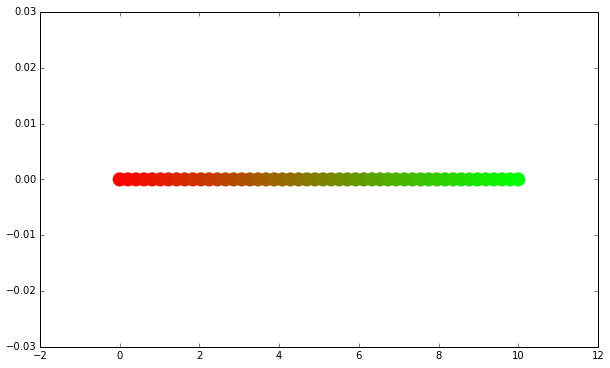

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(n,np.zeros(50), c=mygrad, linewidth=0, s=200)

In [73]:
neibc = sim.iloc[:,0].apply(lambda x: [x/10., 1-x/10., 0, 1])
print neibc.shape
neibc

(25,)


0                            [0.0, 1.0, 0, 1]
1      [0.121443710337, 0.878556289663, 0, 1]
2      [0.163189562121, 0.836810437879, 0, 1]
3        [0.26951788958, 0.73048211042, 0, 1]
4      [0.308313644972, 0.691686355028, 0, 1]
5      [0.101743155628, 0.898256844372, 0, 1]
6        [0.10832346452, 0.89167653548, 0, 1]
7      [0.382677906985, 0.617322093015, 0, 1]
8      [0.221360415679, 0.778639584321, 0, 1]
9      [0.192719575428, 0.807280424572, 0, 1]
10     [0.544781690106, 0.455218309894, 0, 1]
11     [0.209161723786, 0.790838276214, 0, 1]
12     [0.201474215232, 0.798525784768, 0, 1]
13     [0.231372881421, 0.768627118579, 0, 1]
14     [0.171919767326, 0.828080232674, 0, 1]
15     [0.201160771251, 0.798839228749, 0, 1]
16       [0.22063023902, 0.77936976098, 0, 1]
17     [0.116962094968, 0.883037905032, 0, 1]
18    [0.0836409562969, 0.916359043703, 0, 1]
19     [0.164937673288, 0.835062326712, 0, 1]
20     [0.185847006092, 0.814152993908, 0, 1]
21     [0.200944342325, 0.79905565

In [84]:
pltc = cnum.replace(sim.iloc[:,0]).apply(lambda x: matplotlib.colors.rgb2hex([x/10., 1-x/10., 0, 1]))

In [88]:
cnum[pltc == '#27e-17e00']

1063    25
3730    25
4870    25
5664    25
dtype: int64

ValueError: to_rgba: Invalid rgba arg "#27e-17e00"
to_rgb: Invalid rgb arg "#27e-17e00"
invalid hex color string "#27e-17e00"

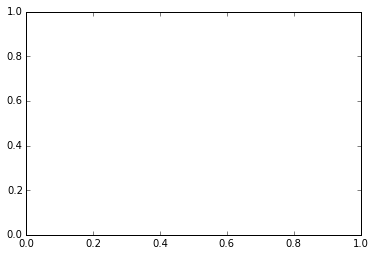

In [85]:
fdf.plot(kind='scatter', x='lon', y='lat', c=pltc)